<a href="https://colab.research.google.com/github/VarishuPant99/Narrative_Text_Generation/blob/main/TGPT_2_Text_Generating_Model_w_GPU_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x
!pip install -q gpt-2-simple
import gpt_2_simple as gpt2
from datetime import datetime
from google.colab import files

## Downloading GPT-2

If you're retraining a model on new text, you need to download the GPT-2 model first. 

There are three released sizes of GPT-2:

* `124M` (default): the "small" model, 500MB on disk.
* `355M`: the "medium" model, 1.5GB on disk.
* `774M`: the "large" model, cannot currently be finetuned with Colaboratory but can be used to generate text from the pretrained model (see later in Notebook)
* `1558M`: the "extra large", true model. Will not work if a K80 GPU is attached to the notebook. (like `774M`, it cannot be finetuned).

Larger models have more knowledge, but take longer to finetune and longer to generate text. You can specify which base model to use by changing `model_name` in the cells below.

The next cell downloads it from Google Cloud Storage and saves it in the Colaboratory VM at `/models/<model_name>`.

This model isn't permanently saved in the Colaboratory VM; you'll have to redownload it if you want to retrain it at a later time.

In [ ]:
gpt2.download_gpt2(model_name="124M")

Fetching checkpoint: 1.05Mit [00:00, 257Mit/s]                                                      
Fetching encoder.json: 1.05Mit [00:00, 3.29Mit/s]
Fetching hparams.json: 1.05Mit [00:00, 511Mit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 498Mit [00:15, 32.8Mit/s]                                  
Fetching model.ckpt.index: 1.05Mit [00:00, 463Mit/s]                                                
Fetching model.ckpt.meta: 1.05Mit [00:00, 4.63Mit/s]
Fetching vocab.bpe: 1.05Mit [00:00, 5.14Mit/s]


In [ ]:
gpt2.mount_gdrive()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/')

In [ ]:
file_name = "proj.txt"

In [ ]:
gpt2.copy_file_from_gdrive(file_name)

## Finetune GPT-2

The next cell will start the actual finetuning of GPT-2. It creates a persistent TensorFlow session which stores the training config, then runs the training for the specified number of `steps`. (to have the finetuning run indefinitely, set `steps = -1`)

The model checkpoints will be saved in `/checkpoint/run1` by default. The checkpoints are saved every 500 steps (can be changed) and when the cell is stopped.

The training might time out after 4ish hours; make sure you end training and save the results so you don't lose them!

**IMPORTANT NOTE:** If you want to rerun this cell, **restart the VM first** (Runtime -> Restart Runtime). You will need to rerun imports but not recopy files.

Other optional-but-helpful parameters for `gpt2.finetune`:


*  **`restore_from`**: Set to `fresh` to start training from the base GPT-2, or set to `latest` to restart training from an existing checkpoint.
* **`sample_every`**: Number of steps to print example output
* **`print_every`**: Number of steps to print training progress.
* **`learning_rate`**:  Learning rate for the training. (default `1e-4`, can lower to `1e-5` if you have <1MB input data)
*  **`run_name`**: subfolder within `checkpoint` to save the model. This is useful if you want to work with multiple models (will also need to specify  `run_name` when loading the model)
* **`overwrite`**: Set to `True` if you want to continue finetuning an existing model (w/ `restore_from='latest'`) without creating duplicate copies. 

In [ ]:
%tensorflow_version 1.x
import gpt_2_simple as gpt2
from datetime import datetime
from google.colab import files
file_name = "proj.txt"
gpt2.copy_file_from_gdrive(file_name)
sess = gpt2.start_tf_sess()

gpt2.finetune(sess,
              dataset=file_name,
              model_name='124M',
              steps=3000,
              restore_from='latest',
              run_name='runend',
              print_every=500,
              learning_rate=1e-5,
              sample_every=200,
              save_every=100
              )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Loading checkpoint models/124M/model.ckpt
INFO:tensorflow:Restoring parameters from models/124M/model.ckpt


  0%|          | 0/1 [00:00<?, ?it/s]

Loading dataset...


100%|██████████| 1/1 [00:05<00:00,  5.14s/it]


dataset has 1079365 tokens
Training...
Saving checkpoint/runend/model-100
Saving checkpoint/runend/model-200
Instructions for updating:
Use standard file APIs to delete files with this prefix.
======== SAMPLE 1 ========



You'll still have him for all those years, if only your soul could bear it.

I love you!

I know the meaning behind all this.


(quietly sighing softly)
“So, you will stay with me and will be fine all these years.”
I turn around.
He nods. “I hope not,” I whisper.‛

�I know you love me,” he whispers when I'm not listening and then I move on to the topic of your pregnancy, at which point I realize there are two questions yet to be answered.
“And you will,” I whisper and there is a quiet sighing from the blonde who has been watching me closely in the hall.
“Please,” he whispers.
“This is your last child, you promised me I would.”
“You promised her when she left. I know who it is.” he says when I nod.
“But she left—you never promised her,” I whisper and he points at me.

Text(0.5, 1.0, 'Validation Loss vs Epochs')

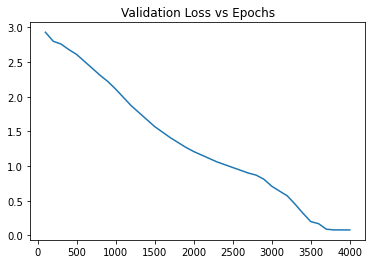

In [ ]:
val_losses=[2.93,2.80,2.76,2.68,2.61,2.51,2.41,2.31,2.22,2.11,1.99,1.87,1.77,1.67,1.57,1.49,1.41,1.34,1.27,
            1.21,1.16,1.11,1.06,1.02,0.98,0.94,0.90,0.87,0.81,0.71,0.64,0.57,0.45,0.32,0.20,0.17,0.09,0.08,0.08,0.08]
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(100,4100,100),val_losses)
plt.title('Validation Loss vs Epochs')

Text(0.5, 1.0, 'Perplexity vs Epochs')

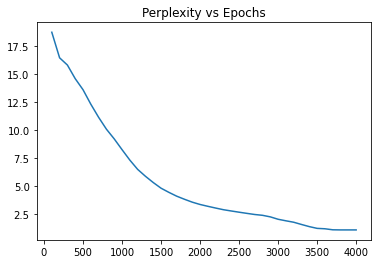

In [ ]:
perplexity=np.exp(val_losses)
plt.plot(np.arange(100,4100,100),perplexity)
plt.title('Perplexity vs Epochs')

In [ ]:
np.min(perplexity)

1.0832870676749586

In [ ]:

np.min(perplexity)

1.0832870676749586

Loss from 2.48 to 2.04 after 1000 steps with lr=1e-5
So reduced lr=1e-6


In [ ]:
gpt2.copy_checkpoint_to_gdrive(run_name='run2')

The next cell will allow you to load the retrained model checkpoint + metadata necessary to generate text.

**IMPORTANT NOTE:** If you want to rerun this cell, **restart the VM first** (Runtime -> Restart Runtime). You will need to rerun imports but not recopy files.

In [1]:
%tensorflow_version 1.x
!pip install -q gpt-2-simple
import gpt_2_simple as gpt2
from datetime import datetime
from google.colab import files
sess = gpt2.start_tf_sess()
# gpt2.load_gpt2(sess, run_name='run2')

TensorFlow 1.x selected.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
gpt2.generate(sess, run_name='run2')

I

Caught
by
miracles
I

can

treat

a
grandchild
of
a
mother
of
a
child
with
an

unprecedented
involving
all
things
my
favorite
favorite
child.

I
will
never
begrudge
anyone.
My
favorite
child?
What?
What?
What?


Truly, I would
cannot
say
myself.
Let me
answer
your
questions.
What
did I do?
Why was I
doesn't I do something?
What
were
they
happening to me?
What were
they?
The
morning
afternoon
afternoon.
Yes?
Yes


I
feared
that
I
might
have
a
dream.
I
did not want to
know.


I do.
I
did not want to
know.
My
mind
was
fuzzy and
fuzzy.
I did want to know.
I wanted to
know
the
first
moment.
I
thought
that
maybe
the
moment would go on.
“You’d
better not think
about it.”
I knew I needed to know. I
hadn’t told him that.
“We’re going to have a
phone call on Saturday afternoon
from you.”
“We’ll be there.”
I have no idea what he’s saying.
I’m quite embarrassed
for him. What’s he like?
“I think he likes me,”
he says softly.
“I think he likes you,” I
mumble.
“Yes,” he answers.
“I’m not going 

1%Plagiarized :I did not come here to argue with you

In [ ]:
ref="A quick note on the name. I'm not a great person for a name like King Arthur." 


In [ ]:
from nltk.translate.bleu_score import corpus_bleu

In [ ]:
gen_file = 'gpt2_gentext_1.txt'

gpt2.generate_to_file(sess,
                      destination_path=gen_file,
                      length=50,
                      temperature=0.7,
                      nsamples=100,
                      batch_size=20
                      )

In [ ]:
reference=set(open('got.txt',encoding='latin-1',mode='r').read().lower().split())

In [ ]:
reference=open('got.txt',encoding='latin-1',mode='r').read().lower().split()


In [ ]:
candidate=open('gpt2_gentext_1.txt',encoding='latin-1',mode='r').read().lower().split()


In [ ]:
# cumulative BLEU scores
from nltk.translate.bleu_score import sentence_bleu
print('Cumulative 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
print('Cumulative 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0)))
print('Cumulative 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0.33, 0)))
print('Cumulative 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25)))

In [ ]:
print('Cumulative 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
print('Cumulative 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0)))
print('Cumulative 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0.33, 0)))
print('Cumulative 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25)))

If you're creating an API based on your model and need to pass the generated text elsewhere, you can do `text = gpt2.generate(sess, return_as_list=True)[0]`

You can also pass in a `prefix` to the generate function to force the text to start with a given character sequence and generate text from there (good if you add an indicator when the text starts).

You can also generate multiple texts at a time by specifing `nsamples`. Unique to GPT-2, you can pass a `batch_size` to generate multiple samples in parallel, giving a massive speedup (in Colaboratory, set a maximum of 20 for `batch_size`).

Other optional-but-helpful parameters for `gpt2.generate` and friends:

*  **`length`**: Number of tokens to generate (default 1023, the maximum)
* **`temperature`**: The higher the temperature, the crazier the text (default 0.7, recommended to keep between 0.7 and 1.0)
* **`top_k`**: Limits the generated guesses to the top *k* guesses (default 0 which disables the behavior; if the generated output is super crazy, you may want to set `top_k=40`)
* **`top_p`**: Nucleus sampling: limits the generated guesses to a cumulative probability. (gets good results on a dataset with `top_p=0.9`)
* **`truncate`**: Truncates the input text until a given sequence, excluding that sequence (e.g. if `truncate='<|endoftext|>'`, the returned text will include everything before the first `<|endoftext|>`). It may be useful to combine this with a smaller `length` if the input texts are short.
*  **`include_prefix`**: If using `truncate` and `include_prefix=False`, the specified `prefix` will not be included in the returned text.

Hyperparameter Tuning


temperature: The higher the temperature, the crazier the text (default 0.7, recommended to keep between 0.7 and 1.0)


100%Unique

In [ ]:
gpt2.generate(sess,
              run_name='run2',
              length=250,
              temperature=0.5,
              prefix="Lannister",
              top_k=0,
              top_p=0.0,
              nsamples=2,
              batch_size=2,
              include_prefix=True
              )

Lannister's words had been words as vile as slanders. Yet she had not been a slayer.  I am not a slayer,  she said curtly, watching the duel as the others looked on in silence as the combatants took their turns.

Ser Waymar Royce took on the eunuch, the oak servant Thel 'The Eye' Sharpe wore the lanceman

The first two rounds were man-to-man, but the three most recent rounds were Catelyn and Joff, who she had come to know and care so deeply. She had come to love the man she was, not the woman he had replaced. Tyrion had taken her to man and her after her. The woman had brought forth the baby. They called it the litterman, because it was the only thing that kept it alive inside the mother's cupboard while she drank from it. When she was ready, they pushed it out of her grip and threw it across the room, at her husband's advice.

Tyrion had watched her every movement, carefully. When they were at it, he would pull the sword from her belt and swing it in the air, one long swing, the
Lanni

In [ ]:
gpt2.generate(sess,
              run_name='run2',
              length=250,
              temperature=0.8,
              prefix="Lannister",
              top_k=0,
              top_p=0.0,
              nsamples=2,
              batch_size=2,
              include_prefix=True
              )

Lannister said,  I took her to the Wall, learned the ways of the sea. We've been sent. 

 Yes,  Dany said with undignified rage.

Robb could scarcely wait to get to talk smack with Maester Luwin.  I told you, Maester,  he said, taking Maester Luwin by the arm and pulling him away from the stick, but Will did not budge. The dagger was still clutched firmly in his hand.  You cannot be so damnably wrong, sweet brother. We're going to the Wall together. You're the Seven Kingdoms. We're going to the West. 

Will would approach with his sword in his hand, talking about battle. It was a new challenge for them. They were going to the Trident, a dangerous and perilous distance from the throne room. Will would climb fast, his strength and Maester Luwin's wisdom would guide his determination. But Maester Luwin was a silent man, and he did not answer loud or call his own name.

It was at that moment when little Will was slow he heard his voice shatter.  You can't, Will,  he said.  You can't.
Lanni

In [ ]:
gpt2.generate(sess,
              run_name='run2',
              length=250,
              temperature=1.2,
              prefix="Lannister",
              top_k=0,
              top_p=0.0,
              nsamples=2,
              batch_size=2,
              include_prefix=True
              )

Lannister little sister" will be your lady , Lord Baelish replied coolly. ...... Did you hear what she was saying? She is afraid.  The grotesquerchers began to cloth her clothing. Go on, tearful sister.  You have not had to endure the grief. She changed into her gown and padded across the room, never leaving the table or the door. You did not enter the room,  Ser Waymar told her.  Maester Luwin is here.  At least during your stay with the Others.  She saw that, understood. She knew better than to ask for his consent. Tears filled her eyes.

And then there was Varys beside her. The ugly giant with the beet red face.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,mentally, frightful boy.

 Someone's child  cried Beth, from the roof of the sept.  off the windowsill.  You can catch him there 

 to kill him,  Varys whispered, lip to cheek.  And he's shaking.  Rupert bolted behind him in a goblet of
Lannister their conversations 

 Have you drawn up plans for an excursion to the east?  Jon asked.

 What prome

In [ ]:
gpt2.generate(sess,
              run_name='run2',
              length=250,
              temperature=1.0,
              prefix="Lannister",
              top_k=0,
              top_p=0.9,
              nsamples=2,
              batch_size=2,
              include_prefix=True
              )

Lannister: We must. It will not do. We lost the prince. The queen. And Jon Snow. 

Renly Baratheon was as determined as Ned. Beside him, Aerys Targaryen had become a little soulless as an almond brittle, his hair pinning up as bright as day. His tanned face and tight Toms are party-plucked bastards off the Wall, but Joffrey was the better host, a beautiful raven haired girlishing a fat veil around her eyes. Aerys was almost black-Caucasian, white, or at least riding a khal's blood.  He is of the Dothraki blood,  Tyrion told him.  They are true men but also men of letters.  He looked at Aerys ponderously.  Perhaps I can assist him? 

 Why?  the dwarf said.  I shall give him the big castle on the Wall. 

 Why?  Tyrion said,  you do not want him around my daughters 

lying-human Tyrion gave him a look of pure loathing.  They are my daughters, and theirs are truths I would like to hear 

Tyr
Lannister had been there.

Ned gave a massive shrug and moved to the breast of the row. Two more me

Doesnt make sense much.. gramatically incorrect a lot of times

In [ ]:
gpt2.generate(sess,
              run_name='run2',
              length=250,
              temperature=1.0,
              prefix="Lannister",
              top_k=0,
              top_p=0.7,
              nsamples=2,
              batch_size=2,
              include_prefix=True
              )

Lannister:  you talkin' about Ben? 

 Yes, lordling, no?  Lannister bowed and took her in his arms.  I have talked to Lord Renly about her, but you have not made me sign his oaths. I have not. I tell you, I was away on a business trip not to have gone unnoticed.  He looked at Renly with his long beard, at the bald mannequins in the windows of the vats at his side. He seemed to see everyone in favor of and pressuring Theon Greyjoy, or anyone.

 I did sign the peace Agoncio Renly gave us the Pentateuch, at Pentateuch.  He'd taken the life of a friend, but he had given life of a boy. Renly had given them a boy, a fourteen-year-old, age thirteen.

 Fourteen,  Renly said.  Different from the others.  The words were not spoken, but he who understood them felt free to say what he wanted. Sixteen, that's the big boy's price. Fourteen for his loyalty.  He saw Renly lean over the rail and rough up a loose ball, they were
Lannister's wife, Dany. 

It was not Dany who cried. Her face was shaggy fr

In [ ]:
gpt2.generate(sess,
              run_name='run2',
              length=250,
              temperature=1.0,
              prefix="Lannister",
              top_k=0,
              top_p=0.4,
              nsamples=2,
              batch_size=2,
              include_prefix=True
              )

Lannister's eyes brightened.  You've been taken advantage of. 

Jon did not know what to say.  Enough is enough.  He slapped his own brother on the shoulder with exquisite urgency.  You have no loyalty, Bran. My own loyalty is in the white dragon. My brother has a right to know the secrets of the dragon, does he not?  He threw back his head and roared in disapproval. The jerks in the kitchen table followed him, whistling. He missed his flight. Jon and the girls came rushing back to their palettes. Jon looked as though he were heartbroken. Bran did not hear him. He shouted at him,  PAGE eight thousand gold pieces,  hefted like a silver coin, and looked down on the table in a matter of moments. His brother would be without him quite that fast, he thought. He'd better get used to the napkins. The next morning they hallowed them as pouches for the lice they had taken from his.

Jon Snow was barely above tears.  Is it said that the one who insults the king is a Lugonie?  there were wild loo

In [ ]:
gpt2.generate(sess,
              run_name='run2',
              length=250,
              temperature=0.5,
              prefix="Lannister",
              top_k=0,
              top_p=0.7,
              nsamples=2,
              batch_size=2,
              include_prefix=True
              )

Lannister, I'll see you back to the barrows in a few hours. 

The direwolf was waiting for her, waddling along the edges of the cage as the others approached. She stood a few feet from her father as the horses began to outdistance her, but Robb did not so much as look at her as he looked at her.  No,  he said. His voice was hoarse.  No, no more. No more. No more. No more. No more. No more of him. No father, no son ever again. No, Becca, please be away from this storm, be a part of Winterfell again. 

 I don't care,  Robb said.  The children don't need me anymore.  He rose to face her.  You're too kind. 

 I need a husband, too, Becca  Robb said.  From now on, no more. If I need to kill, I'm gone forever. 

There were familiar faces when she turned his way. The one before her, a hulking voice that was different from her father. They were all there now. Ser Rodrik, Jaime, Maester Luwin
Lannister:  I have a feeling you do as well. 

Ned was aghast.  The Others take my wife,  he said, halt

In [ ]:
gpt2.generate(sess,
              run_name='run2',
              length=250,
              temperature=1.0,
              prefix="Lannister",
              top_k=3,
              top_p=0,
              nsamples=2,
              batch_size=2,
              include_prefix=True
              )

Lannister: I am afraid I do, Lord Mormont. 

 You are a man of few assets, Lord Mormont,  Lannister replied.  but you are also a man of few resources, tongues by sea by sea. 

 I have a tongue,  the Lord Mormont said, but within a few second words he sounded like someone who had neither, saying little things but calling out questions.)

Ned heard the wheezy boy's voice again.

And then there was a thump, and the scratching of trees, and the crackling of pots, and the crackling of doors, and the crackling of the corridor, and the thud ofwood everywhere, and the sound of heavy breathing, and the banging of wooden palaces, ofrapped yards, ofcrowds,ofcrowds]  There were snarls everywhere. Ned heard them. He pushed open a courtyard and went the wrong way. The road is narrow, and the road is rough. The redoubt wherethe Lannister and Robb would dress and do their thing, the Halfmoon Keep, Ned said to himself.  AFRICA. 

The Old Bear looked dapp
Lannister said,  You'll want to dress nicely for

In [ ]:

gpt2.generate(sess,
              run_name='run2',
              length=250,
              temperature=1.0,
              prefix="Lannister",
              top_k=10,
              top_p=0,
              nsamples=2,
              batch_size=2,
              include_prefix=True
              )

Lannister is dead. There is no one left to take him in his arms. 

The king's brother rode up.  You are tired, my lord,  the king swore, laughing, as Ser Raymun pulled at his fatigues. Roan cradled Nymeria in his arms, whispering to her that they were heavy things.  Come, let me ride as far as the Dragonpit. 

The blacksmith's boy pulled out the letter Flanders left her with Robb. It read: BLUEBROW: As you will, my lord. 

Robb was pale at last, looking at Bran.  My lady, in the madness you have characterized, no less. 

 A man can be mad, and aware, and frightening, and reckless, and even garbled  Her brother moved closer.  More securely,  He pulled away.

 Close. 

 You have your Far East shapes, do you not? 

Her brother looked at Robb.  Yes. I have my Far East, too. I have my Far East with my family. 

 Open it,  Ned said. He pushed the letter down.  There it is. 

 I
Lannister: What? My lady, he's not breathing. 

The dwarf gave her a menacing look.  Septa Mordane is only a direwo

For bulk generation, you can generate a large amount of text to a file and sort out the samples locally on your computer. The next cell will generate a generated text file with a unique timestamp.

You can rerun the cells as many times as you want for even more generated texts!

In [ ]:
gen_file = 'gpt2_gentext_{:%Y%m%d_%H%M%S}.txt'.format(datetime.utcnow())

gpt2.generate_to_file(sess,
                      destination_path=gen_file,
                      length=500,
                      temperature=0.7,
                      nsamples=100,
                      batch_size=20
                      )

In [ ]:
# may have to run twice to get file to download
files.download(gen_file)

In [ ]:
#!kill -9 -1

# LICENSE

MIT License

Copyright (c) 2019 Max Woolf

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.